# STEP #1: IMPORT LIBRARIES AND DATASET

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [32]:
# Alternatively, you can use the same dataset made readily available by keras Using the following lines of code:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


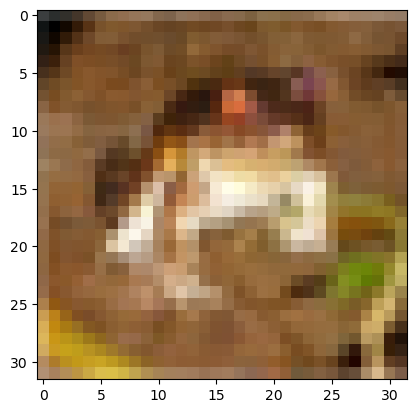

In [33]:
plt.imshow(X_train[0], cmap="gray")

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
X_test.shape

(10000, 32, 32, 3)

# STEP #2: PERFORM DATA VISUALIZATION

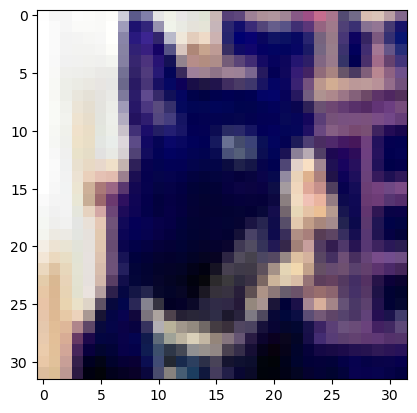

In [36]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [37]:
label = y_train[i]
label


array([3], dtype=uint8)

c:\Users\hks56\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


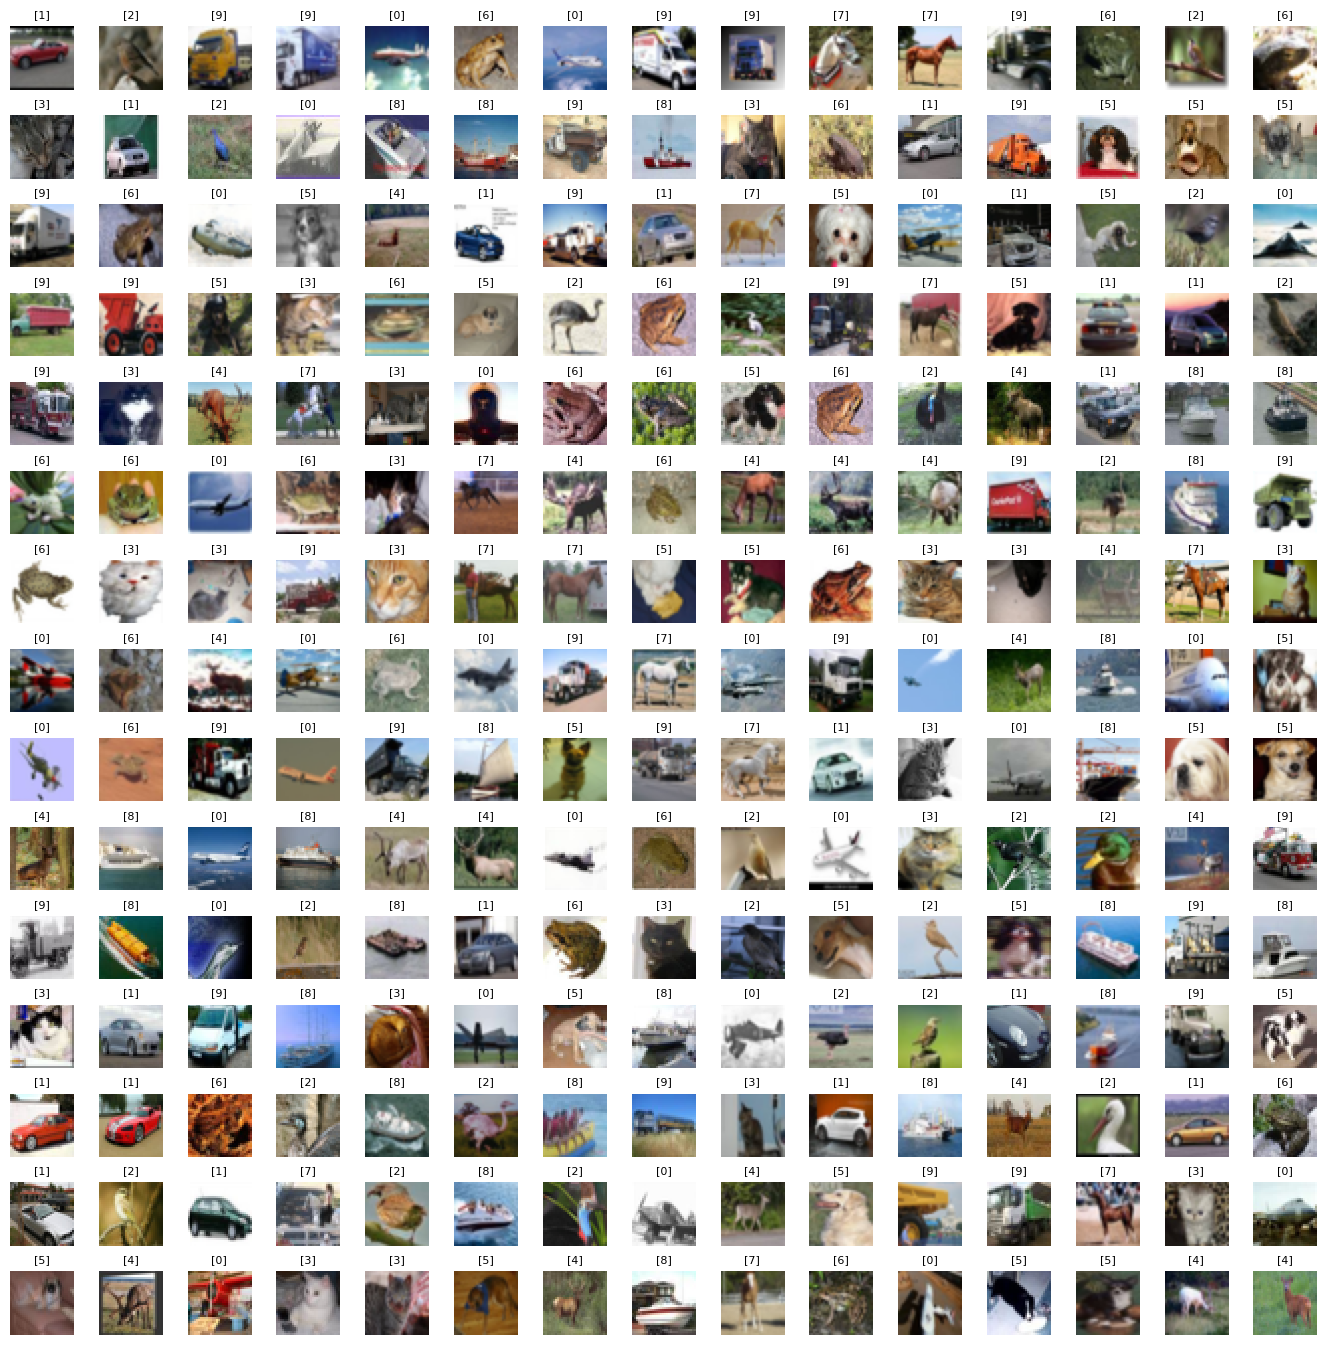

In [38]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #3: PERFORM DATA PREPROCESSING

In [39]:
X_train = X_train / 255
X_test = X_test / 255

In [40]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [41]:
noise_dataset = np.array(noise_dataset)

In [42]:
noise_dataset.shape

(50000, 32, 32, 3)

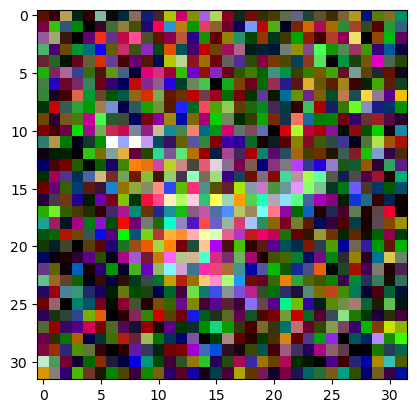

In [43]:
plt.imshow(noise_dataset[22], cmap="gray")

In [44]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 32, 32, 3)

# STEP #4: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [50]:
# 모델 생성
input_shape = X_train.shape[1:]
autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])


In [51]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 3)         867       
                                                                 
Total params: 11,011
Trainable params: 11,011
Non-trai

In [58]:
autoencoder.fit(noise_dataset, X_train, epochs=10, batch_size=128, validation_data=(noise_test_set, X_test))

Epoch 1/10
391/391 [==============================] - 251s 643ms/step - loss: 0.5682 - val_loss: 0.5684
Epoch 2/10
391/391 [==============================] - 311s 796ms/step - loss: 0.5671 - val_loss: 0.5675
Epoch 3/10
391/391 [==============================] - 269s 687ms/step - loss: 0.5665 - val_loss: 0.5672
Epoch 4/10
391/391 [==============================] - 208s 531ms/step - loss: 0.5660 - val_loss: 0.5667
Epoch 5/10
391/391 [==============================] - 181s 464ms/step - loss: 0.5658 - val_loss: 0.5664
Epoch 6/10
391/391 [==============================] - 199s 508ms/step - loss: 0.5655 - val_loss: 0.5663
Epoch 7/10
391/391 [==============================] - 167s 426ms/step - loss: 0.5653 - val_loss: 0.5662
Epoch 8/10
391/391 [==============================] - 111s 283ms/step - loss: 0.5652 - val_loss: 0.5661
Epoch 9/10
391/391 [==============================] - 88s 224ms/step - loss: 0.5651 - val_loss: 0.5659
Epoch 10/10
391/391 [==============================] - 96s 246ms/

# STEP #5: EVALUATE TRAINED MODEL PERFORMANCE

In [59]:
evaluation = autoencoder.evaluate(noise_test_set, X_test)
print('Test Accuracy : {:.3f}'.format(evaluation))

313/313 [==============================] - 4s 14ms/step - loss: 0.5659
Test Accuracy : 0.566


In [60]:
predicted = autoencoder.predict(noise_test_set[:10])

1/1 [==============================] - 0s 59ms/step


In [61]:
predicted.shape

(10, 32, 32, 3)

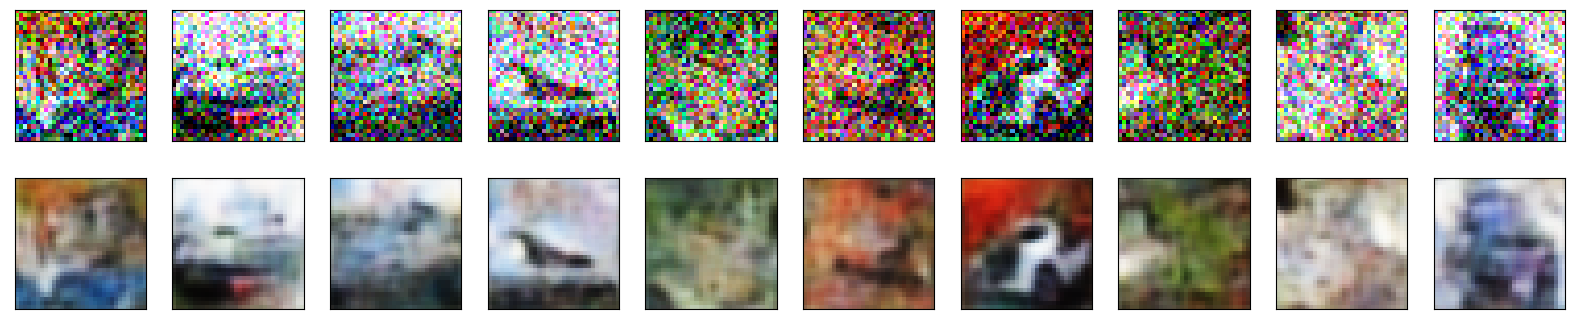

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!